In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:


transit = ['data/transit_lines/cities.csv', 'data/transit_lines/lines.csv', 
           'data/transit_lines/station_lines.csv', 'data/transit_lines/stations.csv', 
           'data/transit_lines/systems.csv', 'data/transit_lines/track_lines.csv', 
           'data/transit_lines/tracks.csv']
cities, lines, station_lines, stations, systems, track_lines, tracks = [pd.read_csv(i) for i in transit]


In [4]:
stations.city_id.value_counts()[:10].sort_values()

82      370
139     374
107     404
78      467
1       685
95      902
69      911
206    1148
91     1278
114    3335
Name: city_id, dtype: int64

In [5]:
stations=stations.dropna(subset=['closure','name','opening'])
stations=stations[stations.closure>=9999]
stations=stations[stations.opening>0]
stations=stations[stations.opening<=2030]
stations.columns=['id','stations_name','geometry','buildstart','opening','closure','city_id']
stations['Long']=stations['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[0])
stations['Lat']=stations['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(')')[0])
id_country=pd.DataFrame({'city_id':cities.id,'country':cities.country,'name':cities.name})

stations=pd.merge(stations,id_country)
stations.head()





,id,stations_name,geometry,buildstart,opening,closure,city_id,Long,Lat,country,name
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo
1,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114,140.042146725175,35.6726021159981,Japan,Tokyo
2,7696,Keisei Makuhari,POINT(140.056077093286 35.6605591225961),1921.0,1921.0,999999.0,114,140.056077093286,35.6605591225961,Japan,Tokyo
3,7697,Kemigawa,POINT(140.066304589107 35.6526280375642),1921.0,1921.0,999999.0,114,140.066304589107,35.6526280375642,Japan,Tokyo
4,7698,Keisei Inage,POINT(140.085607402414 35.6378035803563),1921.0,1921.0,999999.0,114,140.085607402414,35.6378035803563,Japan,Tokyo


In [7]:
id_country=pd.DataFrame({'city_id':cities.id,'country':cities.country,'name':cities.name})

id_country

,city_id,country,name
0,5,Scotland,Aberdeen
1,6,Australia,Adelaide
2,7,Algeria,Algiers
3,9,Turkey,Ankara
4,16,Brazil,Belém
...,...,...,...
329,265,France,Nantes
330,110,Sweden,Stockholm
331,266,France,Rennes
332,15,China,Beijing


In [8]:
tracks = tracks.drop(columns=['geometry','buildstart','opening', 'closure'])
tracks

,id,length,city_id
0,1911,6719,29
1,2563,199,118
2,2557,925,118
3,2558,881,118
4,2564,213,118
...,...,...,...
9266,9732,383,48
9267,9734,28,48
9268,9735,305,48
9269,9736,828,48


In [9]:
data1 = stations.merge(tracks, on= 'city_id')
data1

,id_x,stations_name,geometry,buildstart,opening,closure,city_id,Long,Lat,country,name,id_y,length
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,3434,3534
1,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,3433,4966
2,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1918,15949
3,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1913,1085
4,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1912,12887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970645,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8557,43
3970646,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8558,44
3970647,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8559,2830
3970648,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8560,2819


In [10]:
data = data1.merge(id_country, on= 'city_id')
data

,id_x,stations_name,geometry,buildstart,opening,closure,city_id,Long,Lat,country_x,name_x,id_y,length,country_y,name_y
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,3434,3534,Japan,Tokyo
1,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,3433,4966,Japan,Tokyo
2,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1918,15949,Japan,Tokyo
3,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1913,1085,Japan,Tokyo
4,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,140.024812197129,35.6837744784723,Japan,Tokyo,1912,12887,Japan,Tokyo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970645,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8557,43,France,Orleans
3970646,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8558,44,France,Orleans
3970647,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8559,2830,France,Orleans
3970648,13637,Gare d'Orléans,POINT(1.9052166 47.906798),1998.0,2000.0,999999.0,308,1.9052166,47.906798,France,Orleans,8560,2819,France,Orleans


In [11]:
grouped = data.groupby(['name_y']).sum()
grouped

,id_x,buildstart,opening,closure,city_id,id_y,length
name_y,,,,,,,
Angers,50449392,9702648.0,9716112.0,4.823995e+09,1326600,26105076,2274248
Barcelona,5358910,1142426.0,11890580.0,6.089994e+09,85260,9060345,66163020
Berlin,105870,3854.0,46402.0,2.399998e+07,456,30960,14772
Besancon,2825727,446442.0,447108.0,2.219998e+08,62826,1673214,57648
Bilbao,1342968,673260.0,746124.0,3.719996e+08,95976,419151,1951822
...,...,...,...,...,...,...,...
Valparaíso,39880500,5721000.0,5721075.0,2.924997e+09,362700,24332529,2820207
Venice,63662,0.0,38208.0,1.999998e+07,2320,20560,535240
Vienna,6248872,0.0,7398412.0,3.723996e+09,439432,9843805,1614430


In [12]:
length = [grouped.loc['Tokyo'].length,grouped.loc['Osaka'].length,grouped.loc['New York'].length, grouped.loc['Paris'].length,grouped.loc['Buenos Aires'].length,grouped.loc['Mexico City'].length,grouped.loc['Santiago'].length, grouped.loc['Madrid'].length,grouped.loc['London'].length,grouped.loc['Nantes'].length]
length

[11015050606.0,
 3132103000.0,
 978373336.0,
 428019214.0,
 717098247.0,
 208424902.0,
 139359883.0,
 86396583.0,
 493693958.0,
 57443463.0]

In [14]:
stations.name.value_counts()[:10].sort_values()
cities = np.array(['Tokyo', 'Osaka', 'New York', 'Paris', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Nantes'])

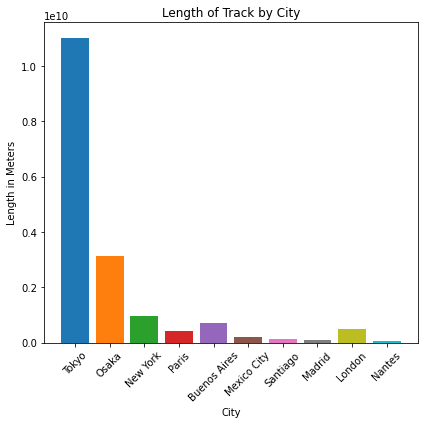

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.bar(cities, length, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf'])
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel('Length in Meters')
ax.set_xlabel('City')
ax.set_title('Length of Track by City')
fig.tight_layout()
plt.savefig("/home/aa1/transit-lines-casestudy/png/length_by_city")